In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

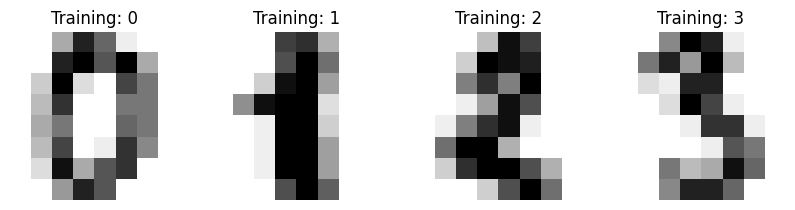

In [51]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [52]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
kruns=[[],[],[],[],[]]
cls=[]
distance  = []
k = [1,3,5,100, 500]
count = [0,0,0,0,0,0,0,0,0,0] 
for o in X_test:
    for x, y in zip(X_train, y_train):
        dist = 0
        for g in range(0,len(x)):
            dist=dist+abs(x[g]-o[g])
        distance.append((y, dist))
    sorted_dist = sorted(distance, key =lambda x: x[1])
    distance = []
    for i in range(len(k)):
        for num in range(k[i]):
            count[sorted_dist[num][0]]=count[sorted_dist[num][0]]+1
        cl=np.argsort(count)
        cls.append(cl[9])
        kruns[i].append(cls)
        cls=[]
        for i in range(len(count)):
            count[i]=0    

In [53]:
miss = [0,0,0,0,0]
for y in range(len(y_test)):
    print("true lable:" ,y_test[y] ,"test labels: ", "k=1", kruns[0][y][0].item(),"k=3", kruns[1][y][0].item(),"k=5", kruns[2][y][0].item(),"k=100", kruns[3][y][0].item(),"k=500", kruns[4][y][0].item())
    if(kruns[0][y][0].item() !=y_test[y]):
      miss[0]=miss[0]+1
    if(kruns[1][y][0].item() !=y_test[y]):
      miss[1]=miss[1]+1
    if(kruns[2][y][0].item() !=y_test[y]):
      miss[2]=miss[2]+1
    if(kruns[3][y][0].item() !=y_test[y]):
      miss[3]=miss[3]+1
    if(kruns[4][y][0].item() !=y_test[y]):
      miss[4]=miss[4]+1

acc = []

for i in miss:
    accuracy=((len(y_test)-i)/len(y_test))*100
    acc.append(accuracy)

print("accuracy k=1: ",acc[0], "accuracy k=3: ", acc[1], "accuracy k=5: ", acc[2], "accuracy k=100: ",acc[3], "accuracy k=500: ", acc[4])


true lable: 8 test labels:  k=1 8 k=3 8 k=5 8 k=100 8 k=500 9
true lable: 8 test labels:  k=1 3 k=3 3 k=5 3 k=100 3 k=500 0
true lable: 4 test labels:  k=1 4 k=3 4 k=5 4 k=100 4 k=500 6
true lable: 9 test labels:  k=1 9 k=3 9 k=5 9 k=100 9 k=500 0
true lable: 0 test labels:  k=1 0 k=3 0 k=5 0 k=100 0 k=500 0
true lable: 8 test labels:  k=1 8 k=3 8 k=5 8 k=100 8 k=500 8
true lable: 9 test labels:  k=1 9 k=3 9 k=5 9 k=100 9 k=500 0
true lable: 8 test labels:  k=1 8 k=3 8 k=5 8 k=100 6 k=500 6
true lable: 1 test labels:  k=1 1 k=3 1 k=5 1 k=100 2 k=500 6
true lable: 2 test labels:  k=1 2 k=3 2 k=5 2 k=100 2 k=500 2
true lable: 3 test labels:  k=1 3 k=3 3 k=5 3 k=100 3 k=500 3
true lable: 4 test labels:  k=1 4 k=3 4 k=5 4 k=100 4 k=500 6
true lable: 5 test labels:  k=1 5 k=3 5 k=5 5 k=100 5 k=500 5
true lable: 6 test labels:  k=1 6 k=3 6 k=5 6 k=100 6 k=500 6
true lable: 7 test labels:  k=1 7 k=3 7 k=5 7 k=100 7 k=500 7
true lable: 8 test labels:  k=1 8 k=3 8 k=5 8 k=100 8 k=500 3
true lab

In [54]:
for i in range(len(kruns)):
    for num in range(len(kruns[0])):
        kruns[i][num] = kruns[i][num][0].item()


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  0  0  1  0  0  0  2  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  0 82  0  2  1  1  4  1]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  1 87  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  2  2  0  1  0  1 75  2]
 [ 0  0  0  4  0  2  0  1  0 85]]


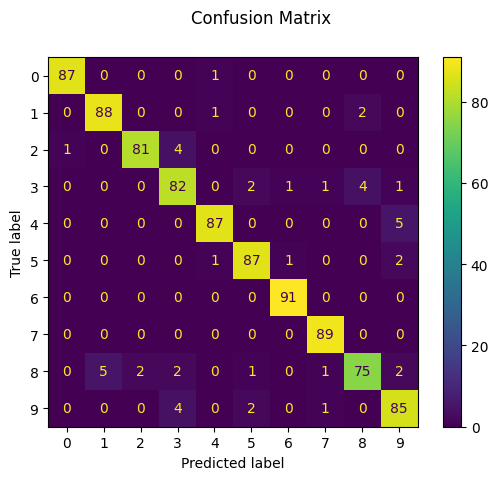

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 89  1  0  0  0  0  0  1  0]
 [ 1  1 80  4  0  0  0  0  0  0]
 [ 0  0  0 81  0  2  0  2  4  2]
 [ 0  0  0  0 86  0  0  2  0  4]
 [ 0  1  0  0  0 87  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  0  1]
 [ 0  4  1  1  0  1  0  1 78  2]
 [ 0  0  0  3  0  2  0  0  0 87]]


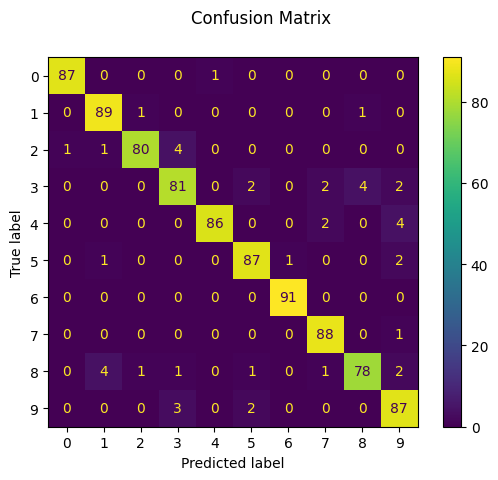

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  1 79  4  0  0  0  0  0  1]
 [ 0  0  0 81  0  2  0  2  4  2]
 [ 0  0  0  0 87  0  0  2  0  3]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  0  1  0  0  0  1 80  1]
 [ 0  0  0  3  0  3  0  0  1 85]]


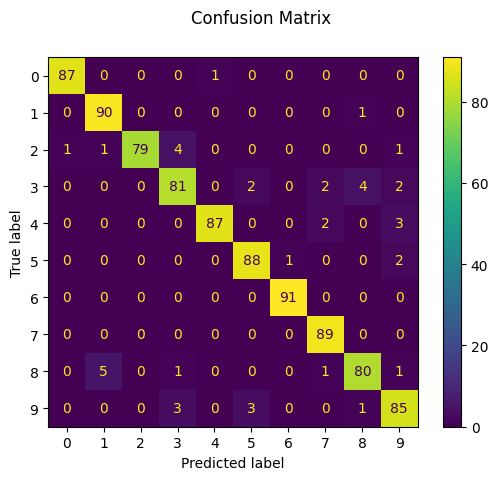

Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 0 69  9  3  0  1  0  0  0  9]
 [ 1  0 73 12  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  4  2  0]
 [ 1  0  0  0 88  1  0  2  0  0]
 [ 0  1  0  2  0 71  4  0  0 13]
 [ 0  2  0  0  0  0 89  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  3  2 10  0  6  1  2 63  1]
 [ 1  0  0  9  0  5  0  2  0 75]]


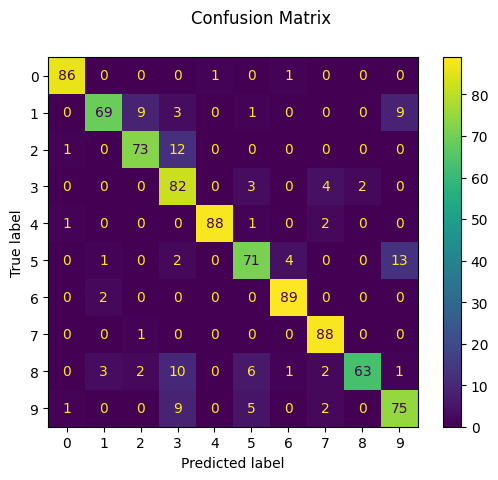

Confusion matrix:
[[83  0  0  0  2  1  2  0  0  0]
 [ 2 14 26  8  6  0 13  0 11 11]
 [ 1  0 28 52  0  0  4  0  1  0]
 [ 1  1  1 80  0  2  0  4  2  0]
 [16  0  1  0 43  2 27  2  1  0]
 [ 6  0  0 18  0 58  7  0  0  2]
 [ 6  1  0  0  0  0 84  0  0  0]
 [ 0  0  2  4  6  3  0 59 15  0]
 [ 3  0 12 23  3 12  3  1 28  3]
 [13  0  0 68  0  5  0  1  0  5]]


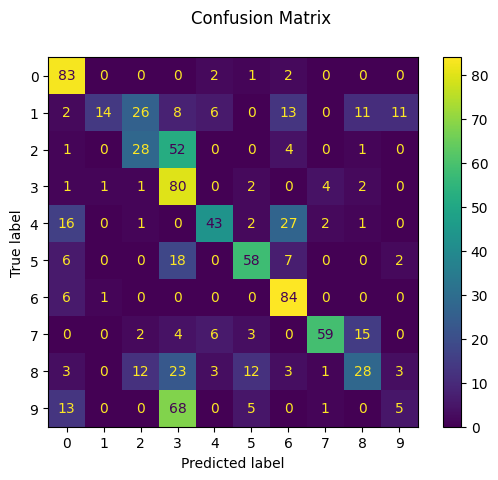

In [55]:
for i in kruns:
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, i)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")
    plt.show()

Here we can see that the confusion matrices get more innaccurate as k increases. When we get to k=500, we can see that there are quite a few common misclassifications. 9 is often classified as 3, which can make sense depending on how the 9 looks, and 2 is often mislabeled as 3. 2 can look like three, so it is understandable that it is misclassified in that case. another understandable one is 8 being misclassified as 3, since 8 is very similar in shape to a 3.